## 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlmodels import mlmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

## 2. Data Collection

In [4]:
# Importing the dataset
data = pd.read_csv('diabetes.csv')
#CHECK FOR NULL VALUES
data.isnull().values.any()
# Drop unused columns, and drop rows with any missing values.
vars = data.columns
data = data[vars].dropna()

## 3. Explore Data

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


False 500
True 268


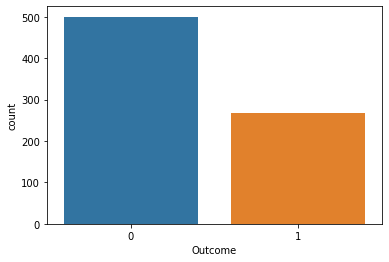

In [6]:
# Check the balance of the data through plot
Y=data.Outcome
ax=sns.countplot(Y, label='count')
B,M=Y.value_counts()
print('False',B)
print('True',M)

In [7]:
data.isnull().values.any()

False

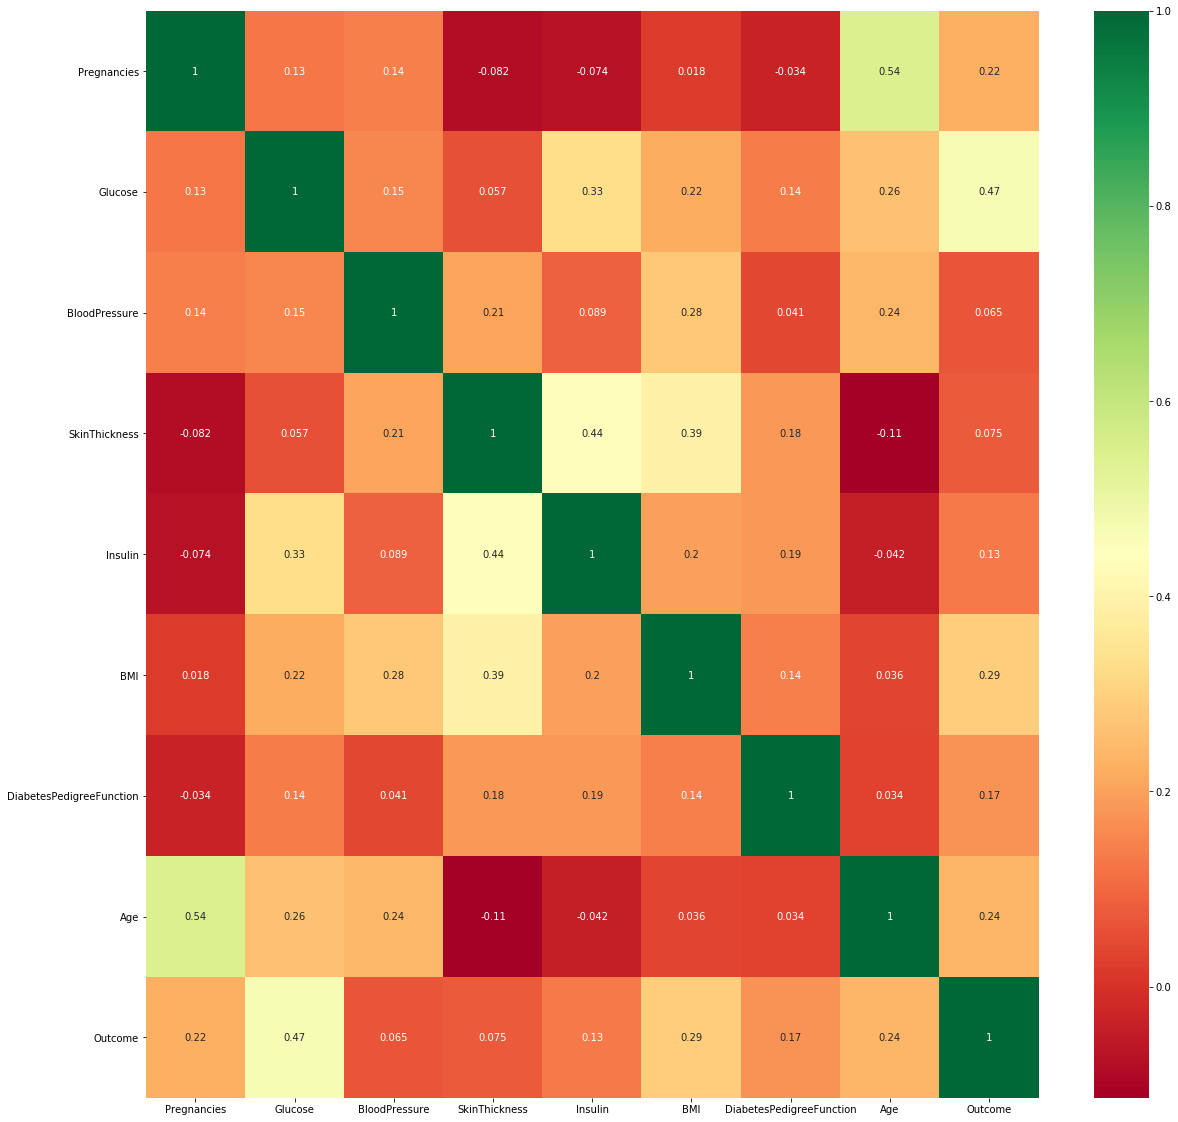

In [8]:
#correlation plot
cormat=data.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(data.corr(),annot=True,cmap= "RdYlGn")

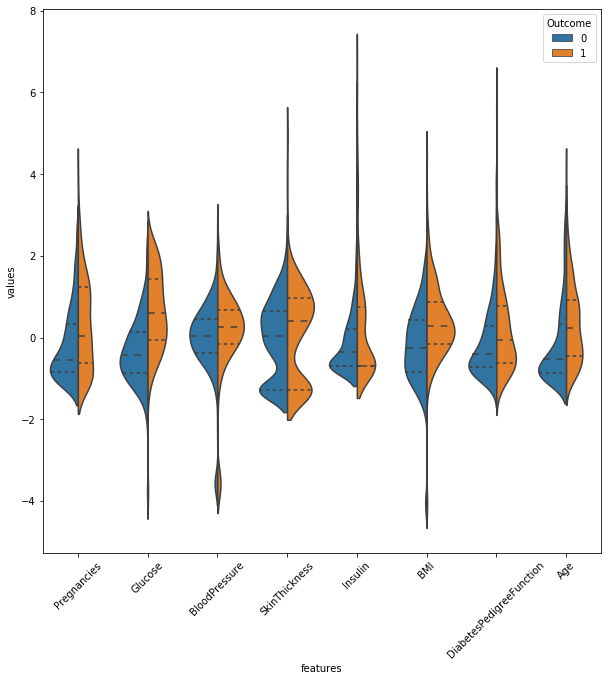

In [9]:
# voiline plot by grouping data of columns
data_std=(data-data.mean())/data.std()
y=data.Outcome
data=pd.concat([y, data_std.iloc[:,0:8]], axis=1)
data=pd.melt(data,id_vars='Outcome', var_name='features',value_name='values')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='values', hue='Outcome', data=data, split=True, inner='quart')
plt.xticks(rotation=45);

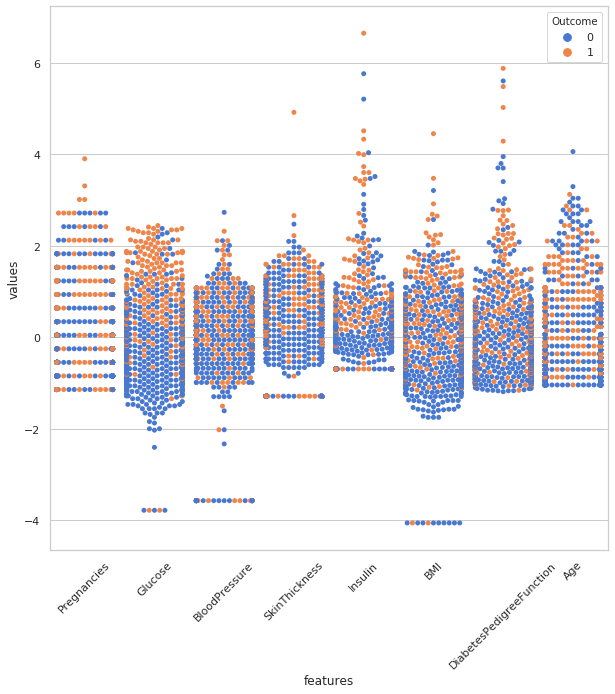

In [10]:
#customizing seaborn plot
sns.set(style='whitegrid', palette='muted')
data=pd.concat([y, data_std.iloc[:,0:8]], axis=1)
data=pd.melt(data,id_vars='Outcome', var_name='features',value_name='values')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='values', hue='Outcome', data=data)
plt.xticks(rotation=45);

## 4. Data Preprocessing & Feature Engineering

In [5]:
#separate X and y
X = data.iloc[:, :-1].values
y = data.iloc[:, 8].values

In [6]:
#Handling missing/zero values
from sklearn.impute import SimpleImputer as Imputer
fill_val = Imputer(missing_values = 0, strategy = 'mean')
fill_val = fill_val.fit(data.iloc[:,0:8])
X=fill_val.transform(data.iloc[:,0:8])
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5. Model Selection

In [6]:
df=mlmodels.mlmodels(X_train, X_test, y_train, y_test)
print(df)

                  Algorithm  Mean Accuracy  Std of Accuracy
0             Random Forest      73.125331         5.121844
1         Logist Regression      75.391327         6.046610
2     KNeighbors classifier      73.929138         5.167758
3            SVM classifier      75.883131         5.718964
4                Kernel SVM      74.751454         5.711539
5               Naive Bayes      73.614490         5.596581
6  Desicion Tree classifier      70.023797         5.508526
7            XGB classifier      72.466949         4.512332


In [12]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_accuracy= best_accuracy*100
best_parameters = grid_search.best_params_
print('Best accuracy: %.2f' %best_accuracy)
print('Best parameters:', best_parameters)

Best accuracy: 75.88
Best parameters: {'C': 1, 'kernel': 'linear'}


In [29]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Save the model as a pickle in a file 
from sklearn.externals import joblib 
joblib.dump(classifier, 'filename.pkl') 

/home/murali/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['filename.pkl']

In [31]:
# Load the model from the file 
SVC_model = joblib.load('filename.pkl') 
# Use the loaded model to make predictions 
y_pred=SVC_model.predict(X_test) 
#determining accuracy
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.8051948051948052


## ANN Modeling 

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn import metrics

Using TensorFlow backend.


In [26]:
# Converting the data into numpy array
train_sample=np.array(X_train)
train_label=np.array(y_train)

#adding layers and training
model=Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(Adam(lr=0.01),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_sample,train_label,batch_size=10,epochs=2000)

Epoch 1/2000
614/614 [==============================] - 1s 1ms/step - loss: 0.5640 - accuracy: 0.7264
Epoch 2/2000
614/614 [==============================] - 0s 314us/step - loss: 0.4762 - accuracy: 0.7720
Epoch 3/2000
614/614 [==============================] - 0s 294us/step - loss: 0.4616 - accuracy: 0.7769
Epoch 4/2000
614/614 [==============================] - 0s 277us/step - loss: 0.4435 - accuracy: 0.7948
Epoch 5/2000
614/614 [==============================] - 0s 276us/step - loss: 0.4295 - accuracy: 0.7915
Epoch 6/2000
614/614 [==============================] - 0s 277us/step - loss: 0.4212 - accuracy: 0.8046
Epoch 7/2000
614/614 [==============================] - 0s 308us/step - loss: 0.4214 - accuracy: 0.7948
Epoch 8/2000
614/614 [==============================] - 0s 296us/step - loss: 0.4060 - accuracy: 0.8094
Epoch 9/2000
614/614 [==============================] - 0s 287us/step - loss: 0.3959 - accuracy: 0.7948
Epoch 10/2000
614/614 [==============================] - 0s 277us/

614/614 [==============================] - 0s 277us/step - loss: 0.3524 - accuracy: 0.9023
Epoch 80/2000
614/614 [==============================] - 0s 248us/step - loss: 0.1790 - accuracy: 0.9202
Epoch 81/2000
614/614 [==============================] - 0s 281us/step - loss: 0.1260 - accuracy: 0.9511
Epoch 82/2000
614/614 [==============================] - 0s 253us/step - loss: 0.1119 - accuracy: 0.9544
Epoch 83/2000
614/614 [==============================] - 0s 269us/step - loss: 0.1025 - accuracy: 0.9528
Epoch 84/2000
614/614 [==============================] - 0s 280us/step - loss: 0.0837 - accuracy: 0.9658
Epoch 85/2000
614/614 [==============================] - 0s 281us/step - loss: 0.1179 - accuracy: 0.9446
Epoch 86/2000
614/614 [==============================] - 0s 280us/step - loss: 0.0903 - accuracy: 0.9577
Epoch 87/2000
614/614 [==============================] - 0s 248us/step - loss: 0.1001 - accuracy: 0.9642
Epoch 88/2000
614/614 [==============================] - 0s 290us/ste

614/614 [==============================] - 0s 279us/step - loss: 0.0477 - accuracy: 0.9772
Epoch 157/2000
614/614 [==============================] - 0s 250us/step - loss: 0.0455 - accuracy: 0.9805
Epoch 158/2000
614/614 [==============================] - 0s 268us/step - loss: 0.0423 - accuracy: 0.9821
Epoch 159/2000
614/614 [==============================] - 0s 289us/step - loss: 0.0489 - accuracy: 0.9788
Epoch 160/2000
614/614 [==============================] - 0s 273us/step - loss: 0.0470 - accuracy: 0.9805
Epoch 161/2000
614/614 [==============================] - 0s 291us/step - loss: 0.0421 - accuracy: 0.9821
Epoch 162/2000
614/614 [==============================] - 0s 273us/step - loss: 0.0623 - accuracy: 0.9772
Epoch 163/2000
614/614 [==============================] - 0s 264us/step - loss: 0.0710 - accuracy: 0.9756
Epoch 164/2000
614/614 [==============================] - 0s 265us/step - loss: 0.1119 - accuracy: 0.9593
Epoch 165/2000
614/614 [==============================] - 0s 

614/614 [==============================] - 0s 327us/step - loss: 0.0282 - accuracy: 0.9837
Epoch 234/2000
614/614 [==============================] - 0s 378us/step - loss: 0.0285 - accuracy: 0.9837
Epoch 235/2000
614/614 [==============================] - 0s 284us/step - loss: 0.0297 - accuracy: 0.9821
Epoch 236/2000
614/614 [==============================] - 0s 287us/step - loss: 0.0380 - accuracy: 0.9772
Epoch 237/2000
614/614 [==============================] - 0s 254us/step - loss: 0.0261 - accuracy: 0.9837
Epoch 238/2000
614/614 [==============================] - 0s 251us/step - loss: 0.0266 - accuracy: 0.9870
Epoch 239/2000
614/614 [==============================] - 0s 299us/step - loss: 0.0253 - accuracy: 0.9853
Epoch 240/2000
614/614 [==============================] - 0s 287us/step - loss: 0.0251 - accuracy: 0.9853
Epoch 241/2000
614/614 [==============================] - 0s 275us/step - loss: 0.0304 - accuracy: 0.9805
Epoch 242/2000
614/614 [==============================] - 0s 

614/614 [==============================] - 0s 291us/step - loss: 0.0382 - accuracy: 0.9821
Epoch 311/2000
614/614 [==============================] - 0s 261us/step - loss: 0.1073 - accuracy: 0.9674
Epoch 312/2000
614/614 [==============================] - 0s 269us/step - loss: 0.2939 - accuracy: 0.9153
Epoch 313/2000
614/614 [==============================] - 0s 252us/step - loss: 0.3663 - accuracy: 0.9088
Epoch 314/2000
614/614 [==============================] - 0s 251us/step - loss: 0.2309 - accuracy: 0.9235
Epoch 315/2000
614/614 [==============================] - 0s 285us/step - loss: 0.1794 - accuracy: 0.9414
Epoch 316/2000
614/614 [==============================] - 0s 248us/step - loss: 0.0998 - accuracy: 0.9495
Epoch 317/2000
614/614 [==============================] - 0s 287us/step - loss: 0.0857 - accuracy: 0.9528
Epoch 318/2000
614/614 [==============================] - 0s 280us/step - loss: 0.0845 - accuracy: 0.9544
Epoch 319/2000
614/614 [==============================] - 0s 

614/614 [==============================] - 0s 278us/step - loss: 0.2264 - accuracy: 0.9300
Epoch 388/2000
614/614 [==============================] - 0s 257us/step - loss: 0.2455 - accuracy: 0.9283
Epoch 389/2000
614/614 [==============================] - 0s 280us/step - loss: 0.1836 - accuracy: 0.9479
Epoch 390/2000
614/614 [==============================] - 0s 295us/step - loss: 0.0665 - accuracy: 0.9674
Epoch 391/2000
614/614 [==============================] - 0s 266us/step - loss: 0.0391 - accuracy: 0.9788
Epoch 392/2000
614/614 [==============================] - 0s 288us/step - loss: 0.0302 - accuracy: 0.9772
Epoch 393/2000
614/614 [==============================] - 0s 248us/step - loss: 0.0293 - accuracy: 0.9788
Epoch 394/2000
614/614 [==============================] - 0s 286us/step - loss: 0.0303 - accuracy: 0.9805
Epoch 395/2000
614/614 [==============================] - 0s 257us/step - loss: 0.0293 - accuracy: 0.9821
Epoch 396/2000
614/614 [==============================] - 0s 

614/614 [==============================] - 0s 270us/step - loss: 0.0436 - accuracy: 0.9805
Epoch 465/2000
614/614 [==============================] - 0s 282us/step - loss: 0.0299 - accuracy: 0.9821
Epoch 466/2000
614/614 [==============================] - 0s 283us/step - loss: 0.0289 - accuracy: 0.9853
Epoch 467/2000
614/614 [==============================] - 0s 272us/step - loss: 0.0345 - accuracy: 0.9821
Epoch 468/2000
614/614 [==============================] - 0s 250us/step - loss: 0.0247 - accuracy: 0.9853
Epoch 469/2000
614/614 [==============================] - 0s 339us/step - loss: 0.0236 - accuracy: 0.9837
Epoch 470/2000
614/614 [==============================] - 0s 287us/step - loss: 0.0240 - accuracy: 0.9837
Epoch 471/2000
614/614 [==============================] - 0s 234us/step - loss: 0.0230 - accuracy: 0.9788
Epoch 472/2000
614/614 [==============================] - 0s 264us/step - loss: 0.0226 - accuracy: 0.9853
Epoch 473/2000
614/614 [==============================] - 0s 

614/614 [==============================] - 0s 278us/step - loss: 0.1901 - accuracy: 0.9463
Epoch 542/2000
614/614 [==============================] - 0s 243us/step - loss: 0.1403 - accuracy: 0.9511
Epoch 543/2000
614/614 [==============================] - 0s 240us/step - loss: 0.1814 - accuracy: 0.9642
Epoch 544/2000
614/614 [==============================] - 0s 272us/step - loss: 0.1016 - accuracy: 0.9625
Epoch 545/2000
614/614 [==============================] - 0s 246us/step - loss: 0.0623 - accuracy: 0.9691
Epoch 546/2000
614/614 [==============================] - 0s 275us/step - loss: 0.0581 - accuracy: 0.9658
Epoch 547/2000
614/614 [==============================] - 0s 299us/step - loss: 0.0368 - accuracy: 0.9772
Epoch 548/2000
614/614 [==============================] - 0s 272us/step - loss: 0.0350 - accuracy: 0.9756
Epoch 549/2000
614/614 [==============================] - 0s 255us/step - loss: 0.0303 - accuracy: 0.9805
Epoch 550/2000
614/614 [==============================] - 0s 

614/614 [==============================] - 0s 282us/step - loss: 0.0277 - accuracy: 0.9788
Epoch 619/2000
614/614 [==============================] - 0s 248us/step - loss: 0.1652 - accuracy: 0.9544
Epoch 620/2000
614/614 [==============================] - 0s 295us/step - loss: 0.6789 - accuracy: 0.9007
Epoch 621/2000
614/614 [==============================] - 0s 262us/step - loss: 0.4316 - accuracy: 0.9121
Epoch 622/2000
614/614 [==============================] - 0s 261us/step - loss: 0.1966 - accuracy: 0.9479
Epoch 623/2000
614/614 [==============================] - 0s 255us/step - loss: 0.1520 - accuracy: 0.9593
Epoch 624/2000
614/614 [==============================] - 0s 282us/step - loss: 0.0876 - accuracy: 0.9658
Epoch 625/2000
614/614 [==============================] - 0s 268us/step - loss: 0.0703 - accuracy: 0.9739
Epoch 626/2000
614/614 [==============================] - 0s 293us/step - loss: 0.0384 - accuracy: 0.9805
Epoch 627/2000
614/614 [==============================] - 0s 

614/614 [==============================] - 0s 254us/step - loss: 0.0195 - accuracy: 0.9902
Epoch 696/2000
614/614 [==============================] - 0s 276us/step - loss: 0.0259 - accuracy: 0.9886
Epoch 697/2000
614/614 [==============================] - 0s 286us/step - loss: 0.0893 - accuracy: 0.9805
Epoch 698/2000
614/614 [==============================] - 0s 291us/step - loss: 0.2276 - accuracy: 0.9381
Epoch 699/2000
614/614 [==============================] - 0s 283us/step - loss: 0.4145 - accuracy: 0.9218
Epoch 700/2000
614/614 [==============================] - 0s 272us/step - loss: 0.2087 - accuracy: 0.9349
Epoch 701/2000
614/614 [==============================] - 0s 271us/step - loss: 0.0619 - accuracy: 0.9723
Epoch 702/2000
614/614 [==============================] - 0s 280us/step - loss: 0.0485 - accuracy: 0.9805
Epoch 703/2000
614/614 [==============================] - 0s 283us/step - loss: 0.0283 - accuracy: 0.9870
Epoch 704/2000
614/614 [==============================] - 0s 

614/614 [==============================] - 0s 297us/step - loss: 0.3702 - accuracy: 0.9397
Epoch 773/2000
614/614 [==============================] - 0s 268us/step - loss: 0.1791 - accuracy: 0.9625
Epoch 774/2000
614/614 [==============================] - 0s 285us/step - loss: 0.1213 - accuracy: 0.9707
Epoch 775/2000
614/614 [==============================] - 0s 296us/step - loss: 0.0877 - accuracy: 0.9707
Epoch 776/2000
614/614 [==============================] - 0s 251us/step - loss: 0.1148 - accuracy: 0.9658
Epoch 777/2000
614/614 [==============================] - 0s 278us/step - loss: 0.0624 - accuracy: 0.9805
Epoch 778/2000
614/614 [==============================] - 0s 294us/step - loss: 0.0296 - accuracy: 0.9853
Epoch 779/2000
614/614 [==============================] - 0s 278us/step - loss: 0.0203 - accuracy: 0.9902
Epoch 780/2000
614/614 [==============================] - 0s 281us/step - loss: 0.0201 - accuracy: 0.9886
Epoch 781/2000
614/614 [==============================] - 0s 

614/614 [==============================] - 0s 249us/step - loss: 0.0355 - accuracy: 0.9821
Epoch 850/2000
614/614 [==============================] - 0s 253us/step - loss: 0.0333 - accuracy: 0.9821
Epoch 851/2000
614/614 [==============================] - 0s 278us/step - loss: 0.0328 - accuracy: 0.9821
Epoch 852/2000
614/614 [==============================] - 0s 245us/step - loss: 0.0328 - accuracy: 0.9821
Epoch 853/2000
614/614 [==============================] - 0s 274us/step - loss: 0.0322 - accuracy: 0.9821
Epoch 854/2000
614/614 [==============================] - 0s 251us/step - loss: 0.0329 - accuracy: 0.9821
Epoch 855/2000
614/614 [==============================] - 0s 279us/step - loss: 0.0326 - accuracy: 0.9821
Epoch 856/2000
614/614 [==============================] - 0s 285us/step - loss: 0.0318 - accuracy: 0.9821
Epoch 857/2000
614/614 [==============================] - 0s 281us/step - loss: 0.0323 - accuracy: 0.9821
Epoch 858/2000
614/614 [==============================] - 0s 

614/614 [==============================] - 0s 273us/step - loss: 0.0280 - accuracy: 0.9837
Epoch 927/2000
614/614 [==============================] - 0s 302us/step - loss: 0.0279 - accuracy: 0.9837
Epoch 928/2000
614/614 [==============================] - 0s 276us/step - loss: 0.0275 - accuracy: 0.9837
Epoch 929/2000
614/614 [==============================] - 0s 296us/step - loss: 0.0275 - accuracy: 0.9837
Epoch 930/2000
614/614 [==============================] - 0s 267us/step - loss: 0.0274 - accuracy: 0.9837
Epoch 931/2000
614/614 [==============================] - 0s 269us/step - loss: 0.0305 - accuracy: 0.9837
Epoch 932/2000
614/614 [==============================] - 0s 278us/step - loss: 0.0274 - accuracy: 0.9837
Epoch 933/2000
614/614 [==============================] - 0s 318us/step - loss: 0.0253 - accuracy: 0.9853
Epoch 934/2000
614/614 [==============================] - 0s 266us/step - loss: 0.0249 - accuracy: 0.9853
Epoch 935/2000
614/614 [==============================] - 0s 

614/614 [==============================] - 0s 290us/step - loss: 0.0277 - accuracy: 0.9805
Epoch 1004/2000
614/614 [==============================] - 0s 266us/step - loss: 0.0279 - accuracy: 0.9723
Epoch 1005/2000
614/614 [==============================] - 0s 251us/step - loss: 0.0295 - accuracy: 0.9821
Epoch 1006/2000
614/614 [==============================] - 0s 304us/step - loss: 0.0296 - accuracy: 0.9756
Epoch 1007/2000
614/614 [==============================] - 0s 275us/step - loss: 0.0524 - accuracy: 0.9756
Epoch 1008/2000
614/614 [==============================] - 0s 269us/step - loss: 0.0306 - accuracy: 0.9805
Epoch 1009/2000
614/614 [==============================] - 0s 286us/step - loss: 0.0318 - accuracy: 0.9788
Epoch 1010/2000
614/614 [==============================] - 0s 258us/step - loss: 0.0346 - accuracy: 0.9772
Epoch 1011/2000
614/614 [==============================] - 0s 277us/step - loss: 0.0296 - accuracy: 0.9805
Epoch 1012/2000
614/614 [============================

614/614 [==============================] - 0s 275us/step - loss: 0.0277 - accuracy: 0.9853
Epoch 1080/2000
614/614 [==============================] - 0s 257us/step - loss: 0.0275 - accuracy: 0.9853
Epoch 1081/2000
614/614 [==============================] - 0s 251us/step - loss: 0.0277 - accuracy: 0.9853
Epoch 1082/2000
614/614 [==============================] - 0s 279us/step - loss: 0.0270 - accuracy: 0.9853
Epoch 1083/2000
614/614 [==============================] - 0s 284us/step - loss: 0.0271 - accuracy: 0.9853
Epoch 1084/2000
614/614 [==============================] - 0s 280us/step - loss: 0.0276 - accuracy: 0.9853
Epoch 1085/2000
614/614 [==============================] - 0s 276us/step - loss: 0.0268 - accuracy: 0.9853
Epoch 1086/2000
614/614 [==============================] - 0s 255us/step - loss: 0.0273 - accuracy: 0.9853
Epoch 1087/2000
614/614 [==============================] - 0s 279us/step - loss: 0.0268 - accuracy: 0.9853
Epoch 1088/2000
614/614 [============================

614/614 [==============================] - 0s 252us/step - loss: 0.0256 - accuracy: 0.9853
Epoch 1156/2000
614/614 [==============================] - 0s 300us/step - loss: 0.0270 - accuracy: 0.9853
Epoch 1157/2000
614/614 [==============================] - 0s 247us/step - loss: 0.0280 - accuracy: 0.9853
Epoch 1158/2000
614/614 [==============================] - 0s 264us/step - loss: 0.0278 - accuracy: 0.9821
Epoch 1159/2000
614/614 [==============================] - 0s 277us/step - loss: 0.0673 - accuracy: 0.9772
Epoch 1160/2000
614/614 [==============================] - 0s 289us/step - loss: 0.0510 - accuracy: 0.9772
Epoch 1161/2000
614/614 [==============================] - 0s 273us/step - loss: 0.1300 - accuracy: 0.9674
Epoch 1162/2000
614/614 [==============================] - 0s 282us/step - loss: 0.1660 - accuracy: 0.9625
Epoch 1163/2000
614/614 [==============================] - 0s 271us/step - loss: 0.0877 - accuracy: 0.9756
Epoch 1164/2000
614/614 [============================

614/614 [==============================] - 0s 284us/step - loss: 0.0293 - accuracy: 0.9853
Epoch 1232/2000
614/614 [==============================] - 0s 270us/step - loss: 0.0293 - accuracy: 0.9853
Epoch 1233/2000
614/614 [==============================] - 0s 300us/step - loss: 0.0295 - accuracy: 0.9853
Epoch 1234/2000
614/614 [==============================] - 0s 260us/step - loss: 0.0295 - accuracy: 0.9853
Epoch 1235/2000
614/614 [==============================] - 0s 265us/step - loss: 0.0294 - accuracy: 0.9853
Epoch 1236/2000
614/614 [==============================] - 0s 283us/step - loss: 0.0289 - accuracy: 0.9853
Epoch 1237/2000
614/614 [==============================] - 0s 305us/step - loss: 0.0291 - accuracy: 0.9853
Epoch 1238/2000
614/614 [==============================] - 0s 240us/step - loss: 0.0291 - accuracy: 0.9853
Epoch 1239/2000
614/614 [==============================] - 0s 244us/step - loss: 0.0289 - accuracy: 0.9853
Epoch 1240/2000
614/614 [============================

614/614 [==============================] - 0s 259us/step - loss: 0.0225 - accuracy: 0.9870
Epoch 1308/2000
614/614 [==============================] - 0s 250us/step - loss: 0.0223 - accuracy: 0.9870
Epoch 1309/2000
614/614 [==============================] - 0s 250us/step - loss: 0.0222 - accuracy: 0.9870
Epoch 1310/2000
614/614 [==============================] - 0s 263us/step - loss: 0.0222 - accuracy: 0.9870
Epoch 1311/2000
614/614 [==============================] - 0s 283us/step - loss: 0.0223 - accuracy: 0.9870
Epoch 1312/2000
614/614 [==============================] - 0s 285us/step - loss: 0.2005 - accuracy: 0.9544
Epoch 1313/2000
614/614 [==============================] - 0s 316us/step - loss: 0.5175 - accuracy: 0.9349
Epoch 1314/2000
614/614 [==============================] - 0s 263us/step - loss: 0.4296 - accuracy: 0.9381
Epoch 1315/2000
614/614 [==============================] - 0s 308us/step - loss: 0.4903 - accuracy: 0.9104
Epoch 1316/2000
614/614 [============================

614/614 [==============================] - 0s 222us/step - loss: 0.0337 - accuracy: 0.9853
Epoch 1384/2000
614/614 [==============================] - 0s 227us/step - loss: 0.0330 - accuracy: 0.9853
Epoch 1385/2000
614/614 [==============================] - 0s 236us/step - loss: 0.0331 - accuracy: 0.9853
Epoch 1386/2000
614/614 [==============================] - 0s 223us/step - loss: 0.0326 - accuracy: 0.9853
Epoch 1387/2000
614/614 [==============================] - 0s 233us/step - loss: 0.0327 - accuracy: 0.9853
Epoch 1388/2000
614/614 [==============================] - 0s 228us/step - loss: 0.0328 - accuracy: 0.9853
Epoch 1389/2000
614/614 [==============================] - 0s 218us/step - loss: 0.0323 - accuracy: 0.9853
Epoch 1390/2000
614/614 [==============================] - 0s 227us/step - loss: 0.0324 - accuracy: 0.9853
Epoch 1391/2000
614/614 [==============================] - 0s 234us/step - loss: 0.0321 - accuracy: 0.9853
Epoch 1392/2000
614/614 [============================

614/614 [==============================] - 0s 234us/step - loss: 0.2915 - accuracy: 0.9479
Epoch 1460/2000
614/614 [==============================] - 0s 250us/step - loss: 0.1017 - accuracy: 0.9691
Epoch 1461/2000
614/614 [==============================] - 0s 232us/step - loss: 0.0481 - accuracy: 0.9788
Epoch 1462/2000
614/614 [==============================] - 0s 315us/step - loss: 0.0423 - accuracy: 0.9805
Epoch 1463/2000
614/614 [==============================] - 0s 267us/step - loss: 0.0404 - accuracy: 0.9805
Epoch 1464/2000
614/614 [==============================] - 0s 224us/step - loss: 0.0388 - accuracy: 0.9821
Epoch 1465/2000
614/614 [==============================] - 0s 314us/step - loss: 0.0430 - accuracy: 0.9788
Epoch 1466/2000
614/614 [==============================] - 0s 271us/step - loss: 0.0368 - accuracy: 0.9821
Epoch 1467/2000
614/614 [==============================] - 0s 297us/step - loss: 0.0353 - accuracy: 0.9837
Epoch 1468/2000
614/614 [============================

614/614 [==============================] - 0s 280us/step - loss: 0.0330 - accuracy: 0.9788
Epoch 1536/2000
614/614 [==============================] - 0s 274us/step - loss: 0.0331 - accuracy: 0.9788
Epoch 1537/2000
614/614 [==============================] - 0s 252us/step - loss: 0.0333 - accuracy: 0.9788
Epoch 1538/2000
614/614 [==============================] - 0s 275us/step - loss: 0.0329 - accuracy: 0.9788
Epoch 1539/2000
614/614 [==============================] - 0s 256us/step - loss: 0.0329 - accuracy: 0.9788
Epoch 1540/2000
614/614 [==============================] - 0s 255us/step - loss: 0.0356 - accuracy: 0.9788
Epoch 1541/2000
614/614 [==============================] - 0s 289us/step - loss: 0.0353 - accuracy: 0.9788
Epoch 1542/2000
614/614 [==============================] - 0s 245us/step - loss: 0.0324 - accuracy: 0.9788
Epoch 1543/2000
614/614 [==============================] - 0s 270us/step - loss: 0.0323 - accuracy: 0.9788
Epoch 1544/2000
614/614 [============================

614/614 [==============================] - 0s 305us/step - loss: 0.0319 - accuracy: 0.9805
Epoch 1612/2000
614/614 [==============================] - 0s 285us/step - loss: 0.0350 - accuracy: 0.9821
Epoch 1613/2000
614/614 [==============================] - 0s 277us/step - loss: 0.0335 - accuracy: 0.9821
Epoch 1614/2000
614/614 [==============================] - 0s 404us/step - loss: 0.0292 - accuracy: 0.9837
Epoch 1615/2000
614/614 [==============================] - 0s 532us/step - loss: 0.0290 - accuracy: 0.9837
Epoch 1616/2000
614/614 [==============================] - 0s 603us/step - loss: 0.0287 - accuracy: 0.9837
Epoch 1617/2000
614/614 [==============================] - 0s 319us/step - loss: 0.0287 - accuracy: 0.9837
Epoch 1618/2000
614/614 [==============================] - 0s 301us/step - loss: 0.0278 - accuracy: 0.9837
Epoch 1619/2000
614/614 [==============================] - 0s 257us/step - loss: 0.0291 - accuracy: 0.9821
Epoch 1620/2000
614/614 [============================

614/614 [==============================] - 0s 326us/step - loss: 0.0447 - accuracy: 0.9788
Epoch 1688/2000
614/614 [==============================] - 0s 285us/step - loss: 0.0431 - accuracy: 0.9805
Epoch 1689/2000
614/614 [==============================] - 0s 310us/step - loss: 0.0425 - accuracy: 0.9805
Epoch 1690/2000
614/614 [==============================] - 0s 252us/step - loss: 0.0415 - accuracy: 0.9788
Epoch 1691/2000
614/614 [==============================] - 0s 301us/step - loss: 0.0426 - accuracy: 0.9788
Epoch 1692/2000
614/614 [==============================] - 0s 290us/step - loss: 0.0439 - accuracy: 0.9788
Epoch 1693/2000
614/614 [==============================] - 0s 370us/step - loss: 0.0424 - accuracy: 0.9805
Epoch 1694/2000
614/614 [==============================] - 0s 296us/step - loss: 0.0411 - accuracy: 0.9805
Epoch 1695/2000
614/614 [==============================] - 0s 258us/step - loss: 0.0408 - accuracy: 0.9805
Epoch 1696/2000
614/614 [============================

614/614 [==============================] - 0s 279us/step - loss: 0.0309 - accuracy: 0.9837
Epoch 1764/2000
614/614 [==============================] - 0s 293us/step - loss: 0.0309 - accuracy: 0.9837
Epoch 1765/2000
614/614 [==============================] - 0s 311us/step - loss: 0.0309 - accuracy: 0.9837
Epoch 1766/2000
614/614 [==============================] - 0s 276us/step - loss: 0.0309 - accuracy: 0.9837
Epoch 1767/2000
614/614 [==============================] - 0s 278us/step - loss: 0.0309 - accuracy: 0.9837
Epoch 1768/2000
614/614 [==============================] - 0s 330us/step - loss: 0.0308 - accuracy: 0.9837
Epoch 1769/2000
614/614 [==============================] - 0s 305us/step - loss: 0.0309 - accuracy: 0.9837
Epoch 1770/2000
614/614 [==============================] - 0s 311us/step - loss: 0.0311 - accuracy: 0.9837
Epoch 1771/2000
614/614 [==============================] - 0s 287us/step - loss: 0.0311 - accuracy: 0.9837
Epoch 1772/2000
614/614 [============================

614/614 [==============================] - 0s 231us/step - loss: 0.0342 - accuracy: 0.9805
Epoch 1840/2000
614/614 [==============================] - 0s 246us/step - loss: 0.0355 - accuracy: 0.9788
Epoch 1841/2000
614/614 [==============================] - 0s 244us/step - loss: 0.0498 - accuracy: 0.9756
Epoch 1842/2000
614/614 [==============================] - 0s 263us/step - loss: 0.0444 - accuracy: 0.9772
Epoch 1843/2000
614/614 [==============================] - 0s 288us/step - loss: 0.0726 - accuracy: 0.9707
Epoch 1844/2000
614/614 [==============================] - 0s 267us/step - loss: 0.0692 - accuracy: 0.9739
Epoch 1845/2000
614/614 [==============================] - 0s 274us/step - loss: 0.1104 - accuracy: 0.9658
Epoch 1846/2000
614/614 [==============================] - 0s 268us/step - loss: 0.0917 - accuracy: 0.9625
Epoch 1847/2000
614/614 [==============================] - 0s 248us/step - loss: 0.1963 - accuracy: 0.9528
Epoch 1848/2000
614/614 [============================

614/614 [==============================] - 0s 243us/step - loss: 0.3215 - accuracy: 0.9446
Epoch 1916/2000
614/614 [==============================] - 0s 274us/step - loss: 0.0687 - accuracy: 0.9691
Epoch 1917/2000
614/614 [==============================] - 0s 239us/step - loss: 0.0527 - accuracy: 0.9739
Epoch 1918/2000
614/614 [==============================] - 0s 221us/step - loss: 0.0462 - accuracy: 0.9805
Epoch 1919/2000
614/614 [==============================] - 0s 229us/step - loss: 0.0563 - accuracy: 0.9821
Epoch 1920/2000
614/614 [==============================] - 0s 281us/step - loss: 0.0378 - accuracy: 0.9805
Epoch 1921/2000
614/614 [==============================] - 0s 229us/step - loss: 0.0307 - accuracy: 0.9837
Epoch 1922/2000
614/614 [==============================] - 0s 244us/step - loss: 0.0307 - accuracy: 0.9837
Epoch 1923/2000
614/614 [==============================] - 0s 238us/step - loss: 0.0304 - accuracy: 0.9837
Epoch 1924/2000
614/614 [============================

614/614 [==============================] - 0s 221us/step - loss: 0.0278 - accuracy: 0.9837
Epoch 1992/2000
614/614 [==============================] - 0s 243us/step - loss: 0.0277 - accuracy: 0.9837
Epoch 1993/2000
614/614 [==============================] - 0s 232us/step - loss: 0.0278 - accuracy: 0.9837
Epoch 1994/2000
614/614 [==============================] - 0s 232us/step - loss: 0.0276 - accuracy: 0.9837
Epoch 1995/2000
614/614 [==============================] - 0s 266us/step - loss: 0.0279 - accuracy: 0.9837
Epoch 1996/2000
614/614 [==============================] - 0s 219us/step - loss: 0.0277 - accuracy: 0.9837
Epoch 1997/2000
614/614 [==============================] - 0s 222us/step - loss: 0.0276 - accuracy: 0.9837
Epoch 1998/2000
614/614 [==============================] - 0s 223us/step - loss: 0.0277 - accuracy: 0.9837
Epoch 1999/2000
614/614 [==============================] - 0s 213us/step - loss: 0.0536 - accuracy: 0.9837
Epoch 2000/2000
614/614 [============================

In [27]:
# Converting the data into numpy array
test_sample=np.array(X_test)
test_label=np.array(y_test)
#Testing DL model
y_pred=model.predict_classes(test_sample, batch_size=10)


In [28]:
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy: {}".format(acc))

#confusion matrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.7207792207792207
[[78 29]
 [14 33]]


In [13]:
#Saving the model
model.save('model.h5')